# Impact Analysis

This notebook is used as the main analysis for our project. We investigate *'impact'*, or the change in the trend slopes over different variables (infection rate, stock price and mobility).

The results are then plotted on a box plot to visualize the general distribution of impact values.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import logging
from os import path
import c3aidatalake
import matplotlib.pyplot as plt

# import our tools
from islandhamstar import cases, mobility, utils, constants

# Display debugging logs
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## Load the list of policies and to the 'Impacts' Table

In [2]:
policies = pd.read_csv('data/policies.csv')
policies

,startDate,policyType,name,location.id
0,2020-03-16T00:00:00Z,C1,School closing,Austria
1,2020-03-12T00:00:00Z,C2,Workplace closing,Austria
2,2020-03-16T00:00:00Z,C3,Cancel public events,Austria
3,2020-03-16T00:00:00Z,C4,Restrictions on gatherings,Austria
4,2020-03-13T00:00:00Z,C5,Close public transport,Austria
...,...,...,...,...
301,2020-03-17T00:00:00Z,C5,Close public transport,UnitedStates
302,2020-03-15T00:00:00Z,C6,Stay at home requirements,UnitedStates
303,2020-03-14T00:00:00Z,C7,Restrictions on internal movement,UnitedStates
304,2020-03-27T00:00:00Z,E1,Income support,UnitedStates


In [3]:
# prepare cleaned dataframes
location_ids = constants.IH_COUNTRIES
#location_ids = ["UnitedStates", "Thailand", "Japan"]

cases_data = cases.get_clean_data(location_ids)
mobility_data = mobility.get_clean_data(location_ids)
stock_data = pd.read_csv('data/stocks.csv', index_col=0, parse_dates=True)

In [4]:
# get impact based on country and start date of a policy

for index, row in policies.iterrows():
    date = pd.to_datetime(row['startDate']).tz_localize(None)
    country = row['location.id']
    
    # get impact on cases
    logger.debug("Cases: ")
    impact = utils.get_impact(cases_data[country].diff(), date, pre_window=14, post_window=28)
    policies.loc[index, ['Cases']] = impact
    
    # get impact on stocks
    logger.debug("Stocks: ")
    impact = utils.get_impact(stock_data[country], date, pre_window=7, post_window=7)
    policies.loc[index, ['Stock']] = impact
    
    # get impact on grocery mobility
    logger.debug("grocery mobility: ")
    impact = utils.get_impact(mobility_data['Grocery'][country], date, pre_window=28, post_window=28)
    policies.loc[index, ['Grocery']] = impact
    
    # get impact on residential mobility
    logger.debug("residential mobility: ")
    impact = utils.get_impact(mobility_data['Residential'][country], date, pre_window=28, post_window=28)
    policies.loc[index, ['Residential']] = impact
    
    # get impact on transit station mobility
    logger.debug("transit mobility: ")
    impact = utils.get_impact(mobility_data['TransitStations'][country], date, pre_window=28, post_window=28)
    policies.loc[index, ['TransitStations']] = impact
    
    # get impact on park mobility
    logger.debug("park mobility: ")
    impact = utils.get_impact(mobility_data['Parks'][country], date, pre_window=28, post_window=28)
    policies.loc[index, ['Parks']] = impact
    
    # get impact on workplaces mobility
    logger.debug("workplaces mobility: ")
    impact = utils.get_impact(mobility_data['Workplaces'][country], date, pre_window=28, post_window=28)
    policies.loc[index, ['Workplaces']] = impact
    
    # get impact on retail mobility
    logger.debug("retail mobility: ")
    impact = utils.get_impact(mobility_data['Retail'][country], date, pre_window=28, post_window=28)
    policies.loc[index, ['Retail']] = impact

INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-16
INFO:root:get_impact: Getting impact score for Austria on 2020-03-12
INFO:root:get_impact: Getting impact score for Austria on 2020-03-12
INFO:root:get_impact: Getting impact score for Austria on 2020-03-12
INFO:root:get_impact: Getting impact score for Austria on 2020-03-12
INFO:root:get_impact: Getting impact score for Austria on 2020-03-12
INFO:root:get_impact: Getting impact score for Austria on 2020-03-12
INFO:root:get_impact: Getting impa

INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-18
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-14
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-14
INFO:root:get_impact: Getting impact score for Belgium on 2020-03-14
INFO:root:get_impact: Getting impa

INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impact score for Finland on 2020-03-12
INFO:root:get_impact: Getting impa

INFO:root:get_impact: Getting impact score for France on 2020-03-13
INFO:root:get_impact: Getting impact score for France on 2020-03-13
INFO:root:get_impact: Getting impact score for France on 2020-03-13
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-17
INFO:root:get_impact: Getting impact score for France on 2020-03-16
INFO:root:get_impact: Getting impact score for France on 2020-03-16
INFO:root:get_impact: Getting impact score for France on 2020-03-16
INFO:root:get_impact: Getting impact score for F

INFO:root:get_impact: Getting impact score for Germany on 2020-03-16
INFO:root:get_impact: Getting impact score for Germany on 2020-03-16
INFO:root:get_impact: Getting impact score for Germany on 2020-03-16
INFO:root:get_impact: Getting impact score for Germany on 2020-03-16
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Germany on 2020-03-23
INFO:root:get_impact: Getting impact score for Greece on 2020-03-10
INFO:root:get_impact: Getting impact score for Greece on 2020-03-10
INFO:root:get_impact: Getting impact

INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-03-10
INFO:root:get_impact: Getting impact score for Italy on 2020-0

INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-23
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-23
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-23
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-23
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-23
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Netherlands on 2020-03-12
INFO:root:get_impact: Getting impact score for Neth

INFO:root:get_impact: Getting impact score for Norway on 2020-03-24
INFO:root:get_impact: Getting impact score for Norway on 2020-03-24
INFO:root:get_impact: Getting impact score for Norway on 2020-03-24
INFO:root:get_impact: Getting impact score for Norway on 2020-03-24
INFO:root:get_impact: Getting impact score for Norway on 2020-03-24
INFO:root:get_impact: Getting impact score for Norway on 2020-03-24
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for Norway on 2020-03-12
INFO:root:get_impact: Getting impact score for N

INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Portugal on 2020-03-09
INFO:root:get_impact: Getting impact score for Russia on 2020-03-19
INFO:root:get_impact: Getting impact score for Russia on 2020-03-19
INFO:root:get_impact: Getting impact score for Russia on 2020-03-19
INFO:root:get_impact: Getting impact score for Russia on 2020-03-19
INFO:root:get_impact: Getting impact score for Russia on 2020-03-19
INFO:root:get_impact: Getting impact score for Russia on 2020-03-19
INFO:root:get_impact: Getting im

INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-18
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-18
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-18
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-18
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for SouthAfrica on 2020-03-26
INFO:root:get_impact: Getting impact score for Sout

INFO:root:get_impact: Getting impact score for Spain on 2020-03-14
INFO:root:get_impact: Getting impact score for Spain on 2020-03-14
INFO:root:get_impact: Getting impact score for Spain on 2020-03-14
INFO:root:get_impact: Getting impact score for Spain on 2020-03-14
INFO:root:get_impact: Getting impact score for Spain on 2020-03-14
INFO:root:get_impact: Getting impact score for Spain on 2020-03-14
INFO:root:get_impact: Getting impact score for Spain on 2020-03-14
INFO:root:get_impact: Getting impact score for Spain on 2020-05-04
INFO:root:get_impact: Getting impact score for Spain on 2020-05-04
INFO:root:get_impact: Getting impact score for Spain on 2020-05-04
INFO:root:get_impact: Getting impact score for Spain on 2020-05-04
INFO:root:get_impact: Getting impact score for Spain on 2020-05-04
INFO:root:get_impact: Getting impact score for Spain on 2020-05-04
INFO:root:get_impact: Getting impact score for Spain on 2020-05-04
INFO:root:get_impact: Getting impact score for Spain on 2020-0

INFO:root:get_impact: Getting impact score for Switzerland on 2020-02-28
INFO:root:get_impact: Getting impact score for Switzerland on 2020-02-28
INFO:root:get_impact: Getting impact score for Switzerland on 2020-02-28
INFO:root:get_impact: Getting impact score for Switzerland on 2020-02-28
INFO:root:get_impact: Getting impact score for Switzerland on 2020-02-28
INFO:root:get_impact: Getting impact score for Switzerland on 2020-02-28
INFO:root:get_impact: Getting impact score for Switzerland on 2020-02-28
INFO:root:get_impact: Getting impact score for Switzerland on 2020-03-17
INFO:root:get_impact: Getting impact score for Switzerland on 2020-03-17
INFO:root:get_impact: Getting impact score for Switzerland on 2020-03-17
INFO:root:get_impact: Getting impact score for Switzerland on 2020-03-17
INFO:root:get_impact: Getting impact score for Switzerland on 2020-03-17
INFO:root:get_impact: Getting impact score for Switzerland on 2020-03-17
INFO:root:get_impact: Getting impact score for Swit

INFO:root:get_impact: Getting impact score for Turkey on 2020-04-20
INFO:root:get_impact: Getting impact score for Turkey on 2020-04-20
INFO:root:get_impact: Getting impact score for Turkey on 2020-04-20
INFO:root:get_impact: Getting impact score for Turkey on 2020-04-20
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-03-28
INFO:root:get_impact: Getting impact score for Turkey on 2020-06-01
INFO:root:get_impact: Getting impact score for Turkey on 2020-06-01
INFO:root:get_impact: Getting impact score for T

INFO:root:get_impact: Getting impact score for Australia on 2020-03-18
INFO:root:get_impact: Getting impact score for Australia on 2020-03-18
INFO:root:get_impact: Getting impact score for Australia on 2020-03-18
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-03-24
INFO:root:get_impact: Getting impact score for Australia on 2020-04-02
INFO:root:get_impact: Getting impact score for Australia on 2020-04-02
INFO:root:get_impact: Getting impact score for Australia on 2020-04-02
INFO:r

INFO:root:get_impact: Getting impact score for China on 2020-01-22
INFO:root:get_impact: Getting impact score for China on 2020-01-22
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-05-10
INFO:root:get_impact: Getting impact score for China on 2020-03-19
INFO:root:get_impact: Getting impact score for China on 2020-03-19
INFO:root:get_impact: Getting impact score for China on 2020-03-19
INFO:root:get_impact: Getting impact score for China on 2020-03-19
INFO:root:get_impact: Getting impact score for China on 2020-0

INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-03-25
INFO:root:get_impact: Getting impact score for India on 2020-0

INFO:root:get_impact: Getting impact score for Indonesia on 2020-04-01
INFO:root:get_impact: Getting impact score for Indonesia on 2020-04-01
INFO:root:get_impact: Getting impact score for Indonesia on 2020-04-01
INFO:root:get_impact: Getting impact score for Indonesia on 2020-04-01
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-03-02
INFO:root:get_impact: Getting impact score for Japan on 2020-04-07
INFO:root:get_impact: Getting impact score for Japan on 2020-04-07
INFO:root:get_impact: Getting impact score for

INFO:root:get_impact: Getting impact score for Malaysia on 2020-03-18
INFO:root:get_impact: Getting impact score for Malaysia on 2020-03-18
INFO:root:get_impact: Getting impact score for Malaysia on 2020-03-18
INFO:root:get_impact: Getting impact score for Malaysia on 2020-03-18
INFO:root:get_impact: Getting impact score for Malaysia on 2020-03-18
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-06
INFO:root:get_impact: Getting impact score for Malaysia on 2020-04-01
INFO:root:get_impact

INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Philippines on 2020-03-18
INFO:root:get_impact: Getting impact score for Phil

INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-05-29
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-05-29
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-05-29
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-04-04
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-05-29
INFO:root:get_impact: Getting impact score for KoreaSouth on 2020-05-29
INFO:root:get_impact: Getting impact score for KoreaSouth on 202

INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:root:get_impact: Getting impact score for Singapore on 2020-04-08
INFO:r

INFO:root:get_impact: Getting impact score for Brazil on 2020-03-12
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-19
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-12
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-12
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-12
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-12
INFO:root:get_impact: Getting impact score for Brazil on 2020-03-12
INFO:root:get_impact: Getting impact score for B

INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-03-29
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-07-27
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-07-27
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-07-27
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-07-27
INFO:root:get_impact: Getting impact score for HongKong_China on 2020-07-27
INFO:root:ge

INFO:root:get_impact: Getting impact score for Canada on 2020-03-31
INFO:root:get_impact: Getting impact score for Canada on 2020-03-31
INFO:root:get_impact: Getting impact score for Canada on 2020-03-31
INFO:root:get_impact: Getting impact score for Canada on 2020-03-31
INFO:root:get_impact: Getting impact score for Canada on 2020-03-31
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-03-16
INFO:root:get_impact: Getting impact score for Canada on 2020-06-26
INFO:root:get_impact: Getting impact score for C

INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-01
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-01
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-01
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-01
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-01
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-01
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-13
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-13
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-13
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-13
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-13
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-13
INFO:root:get_impact: Getting impact score for UnitedStates on 2020-03-13
INFO:root:get_impact: Getting impact s

In [5]:
policies

,startDate,policyType,name,location.id,Cases,Stock,Grocery,Residential,TransitStations,Parks,Workplaces,Retail
0,2020-03-16T00:00:00Z,C1,School closing,Austria,0.172106,0.391341,-0.364112,0.117206,-0.459327,-0.059703,-0.497587,-0.614106
1,2020-03-12T00:00:00Z,C2,Workplace closing,Austria,2.906266,0.126371,-0.360772,0.193601,-0.591528,-0.266414,-0.529449,-0.722954
2,2020-03-16T00:00:00Z,C3,Cancel public events,Austria,0.172106,0.391341,-0.364112,0.117206,-0.459327,-0.059703,-0.497587,-0.614106
3,2020-03-16T00:00:00Z,C4,Restrictions on gatherings,Austria,0.172106,0.391341,-0.364112,0.117206,-0.459327,-0.059703,-0.497587,-0.614106
4,2020-03-13T00:00:00Z,C5,Close public transport,Austria,1.059187,0.310899,-0.425986,0.187132,-0.591679,-0.208915,-0.541652,-0.731768
...,...,...,...,...,...,...,...,...,...,...,...,...
301,2020-03-17T00:00:00Z,C5,Close public transport,UnitedStates,7.505636,0.117882,-0.316997,0.106733,-0.346430,-0.253860,-0.332059,-0.378477
302,2020-03-15T00:00:00Z,C6,Stay at home requirements,UnitedStates,18.249482,0.048974,-0.282334,0.159984,-0.418001,-0.268084,-0.418833,-0.415721
303,2020-03-14T00:00:00Z,C7,Restrictions on internal movement,UnitedStates,14.058645,0.048974,-0.264596,0.162685,-0.421280,-0.271848,-0.415823,-0.416466
304,2020-03-27T00:00:00Z,E1,Income support,UnitedStates,-0.209836,-0.089561,0.007126,-0.105030,1.848904,0.189730,1.233749,1.558125


## Boxplots for Impact Analysis

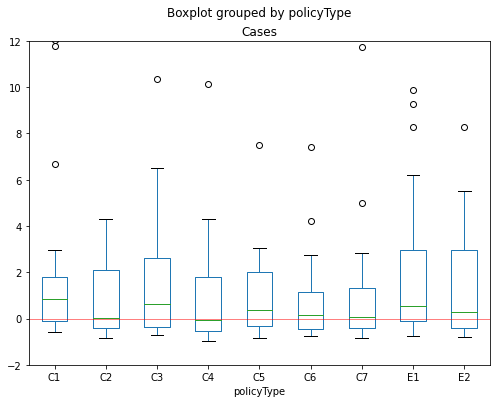

In [6]:
# Impact to New Cases
box_plots = policies.boxplot(by='policyType', column=['Cases'], grid=False, figsize=(8,6)).set_ylim(-2,12)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

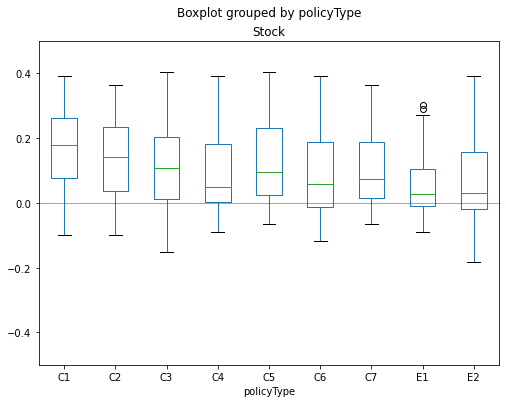

In [7]:
# Impact to Stocks
box_plots = policies.boxplot(by='policyType', column=['Stock'], grid=False, figsize=(8,6)).set_ylim(-0.5,0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

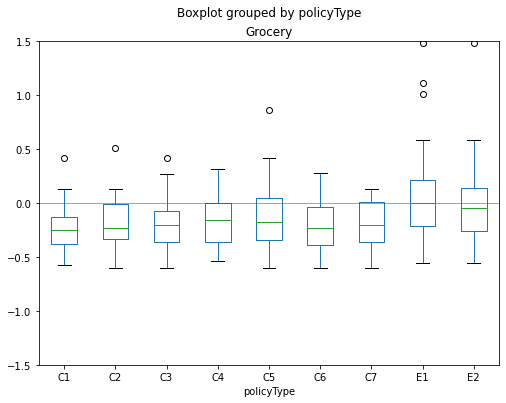

In [8]:
# Impact to Grocery Mobility
box_plots = policies.boxplot(by='policyType', column=['Grocery'], grid=False, figsize=(8,6)).set_ylim(-1.5,1.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

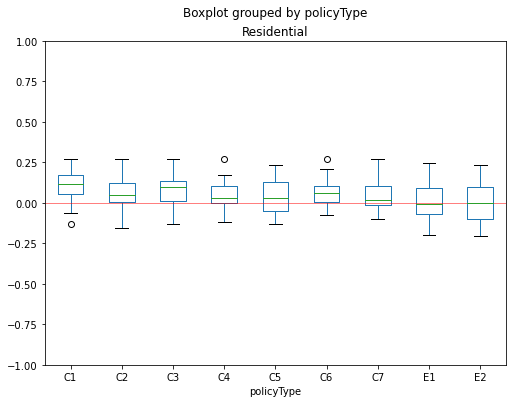

In [9]:
# Impact to Residential Mobility
box_plots = policies.boxplot(by='policyType', column=['Residential'], grid=False, figsize=(8,6)).set_ylim(-1,1)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

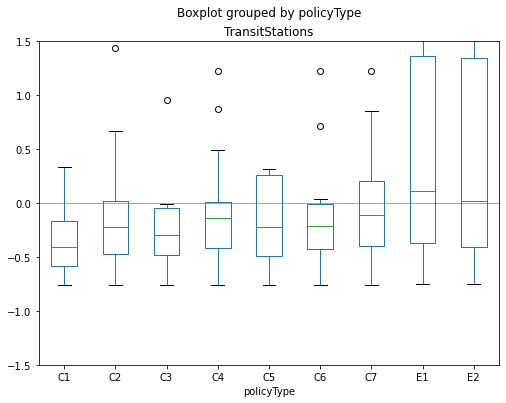

In [10]:
# Impact to Transit Stations Mobility
box_plots = policies.boxplot(by='policyType', column=['TransitStations'], grid=False, figsize=(8,6)).set_ylim(-1.5,1.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

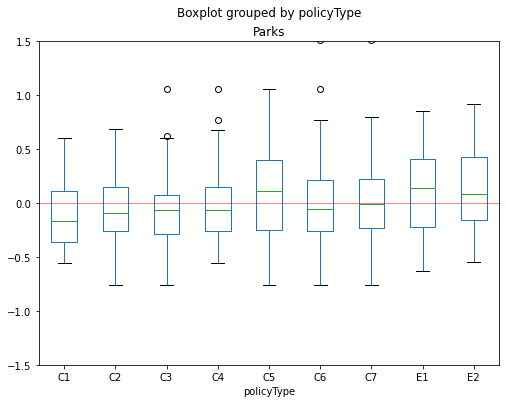

In [11]:
# Impact to Parks Mobility
box_plots = policies.boxplot(by='policyType', column=['Parks'], grid=False, figsize=(8,6)).set_ylim(-1.5,1.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

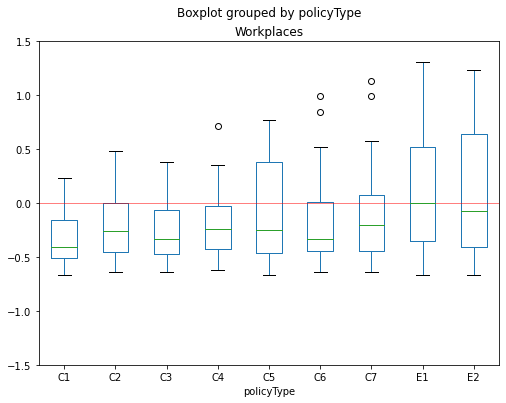

In [12]:
# Impact to Workplace Mobility
box_plots = policies.boxplot(by='policyType', column=['Workplaces'], grid=False, figsize=(8,6)).set_ylim(-1.5,1.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

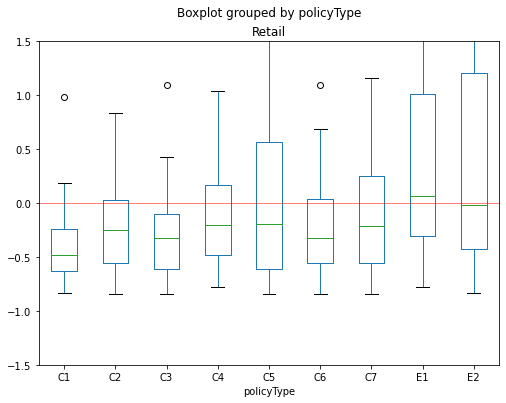

In [13]:
# Impact to Retail Mobility
box_plots = policies.boxplot(by='policyType', column=['Retail'], grid=False, figsize=(8,6)).set_ylim(-1.5,1.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)